In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np

In [8]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

In [6]:
X.shape

(1000, 2)

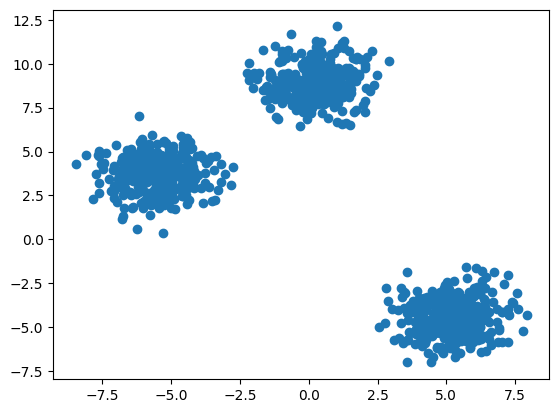

In [9]:
plt.scatter(X[:,0],X[:,1])

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,stratify=y,random_state=42)

In [12]:
from sklearn.cluster import KMeans

In [15]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

/Users/pranjalshukla/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/pranjalshukla/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/pranjalshukla/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/pranjalshukla/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarni

In [16]:
wcss

[34443.22636960945,
 8183.657512837424,
 1384.8361582504353,
 1197.9521073049318,
 1036.0627038048608,
 876.6844858600695,
 782.7407777467502,
 689.3893164445587,
 603.2129919376848,
 553.2073599603772]

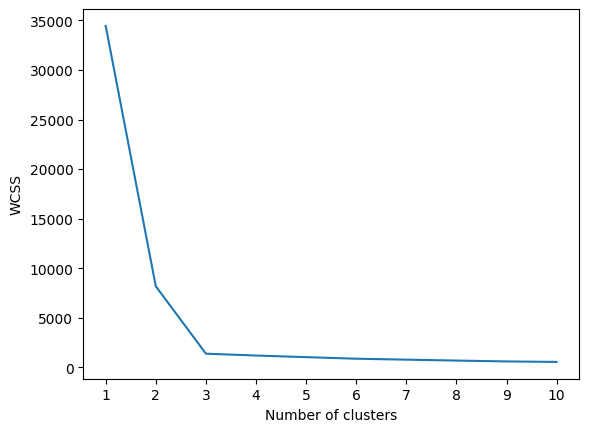

In [18]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [23]:
y_label=kmeans.fit_predict(X_train)

/Users/pranjalshukla/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


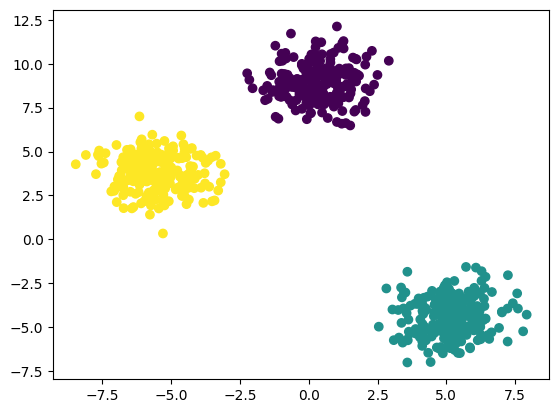

In [24]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_label)


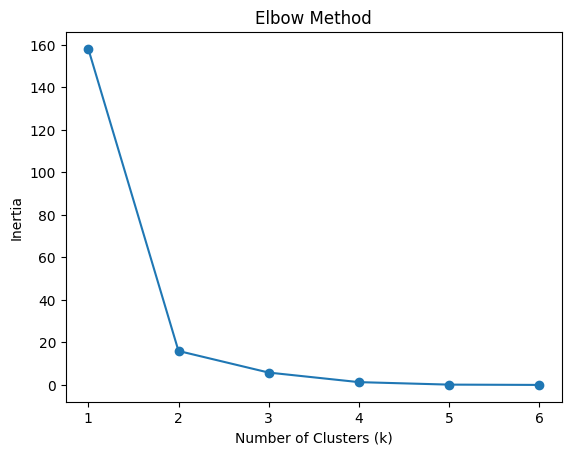

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generate Sample Data
np.random.seed(0)
X = np.array([[1, 2], [5, 8], [1.5, 1.8], [8, 8], [1, 0.6], [9, 11]])

# Elbow Method
inertia = []
for i in range(1, len(X)+1):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit_predict(X)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(range(1, len(X)+1), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


0      2
1      1
2      2
3      2
4      1
      ..
296    1
297    2
298    2
299    1
300    2
Name: Fuel_Type, Length: 301, dtype: int64


/Users/pranjalshukla/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


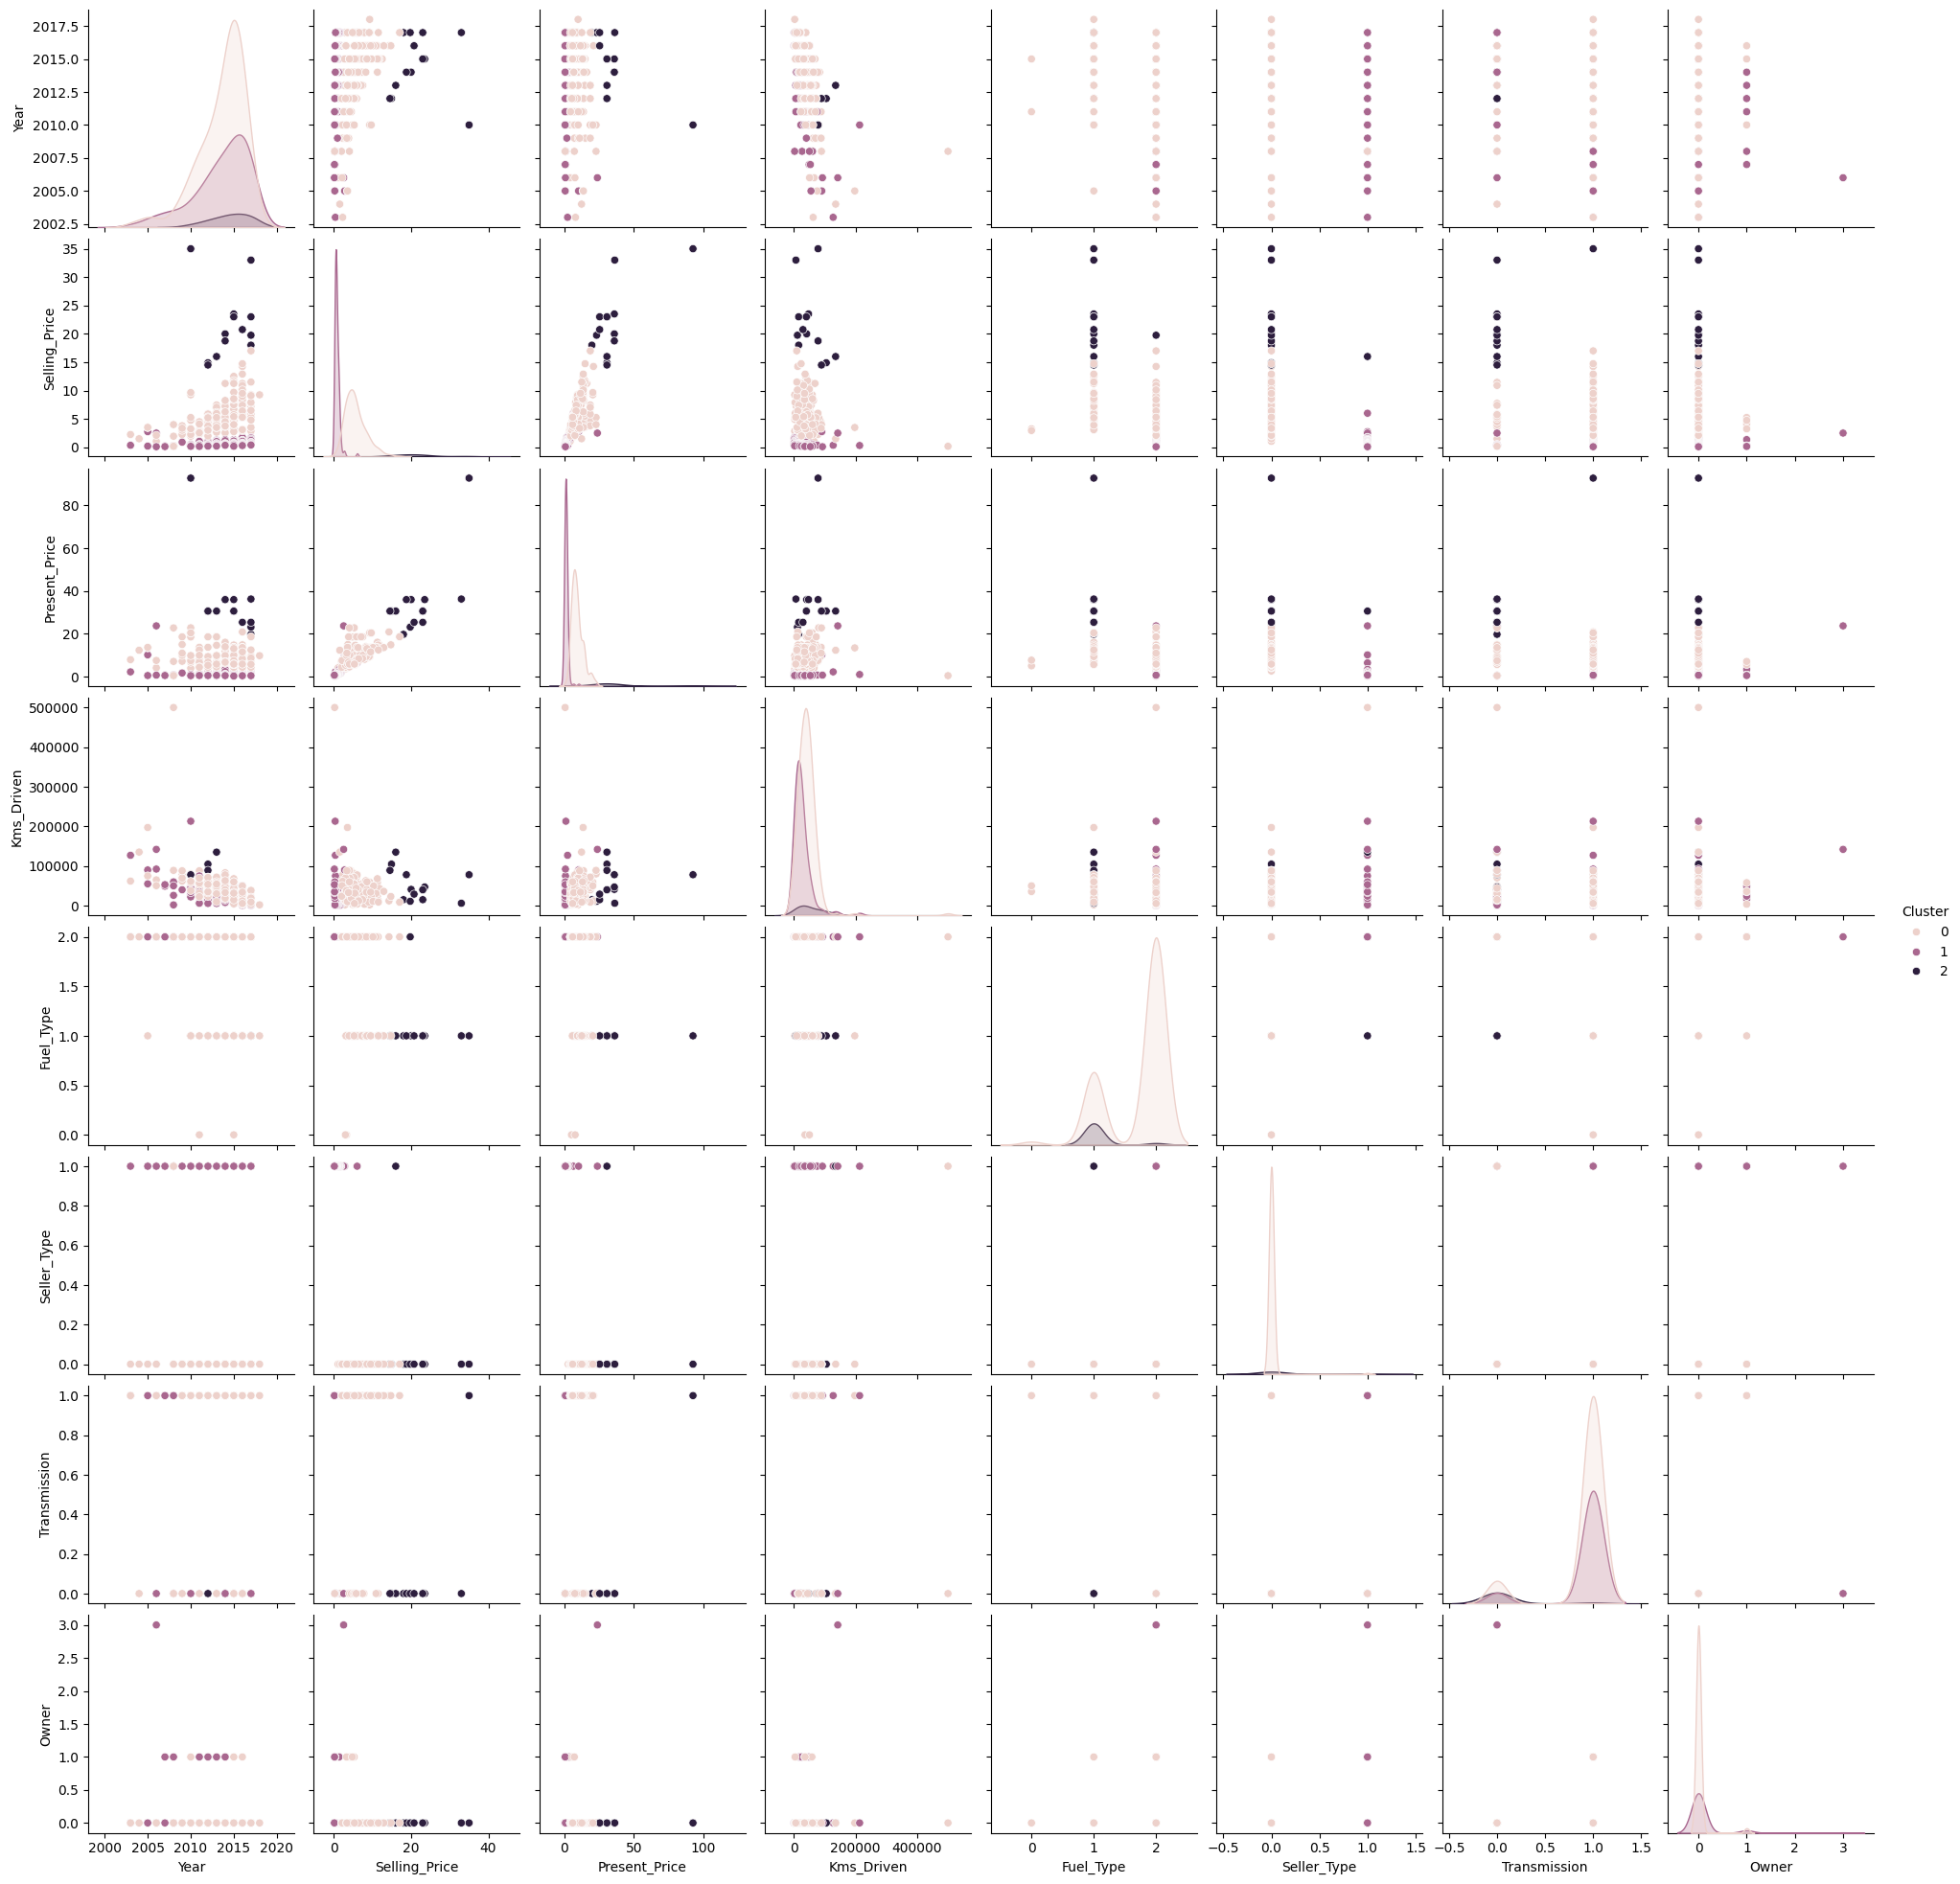

In [26]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
data = pd.read_csv("cardekho_data.csv")  # Replace "your_dataset.csv" with your actual dataset file name

# Label Encoding
label_encoder = LabelEncoder()
data['Fuel_Type'] = label_encoder.fit_transform(data['Fuel_Type'])
data['Seller_Type'] = label_encoder.fit_transform(data['Seller_Type'])
data['Transmission'] = label_encoder.fit_transform(data['Transmission'])
print(data['Fuel_Type'] )
# Feature Selection
selected_features = ['Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']
X = data[selected_features]

# Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Display Results
sns.pairplot(data=data, hue='Cluster', diag_kind='kde')
plt.show()
